<a href="https://colab.research.google.com/github/JuneSHYoo/monitory-ml/blob/main/power_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Factoreal/elec_energy.csv',encoding='utf-8-sig', header=0)

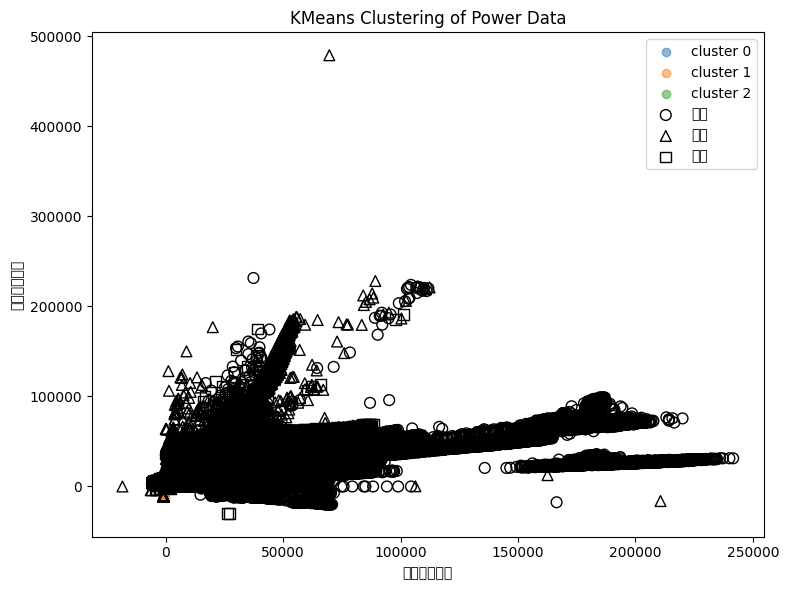

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 예시 데이터셋
# df = pd.read_csv('your_data.csv')
# df[['유효전력평균', '무효전력평균', 'label_역률평균']]

# 1. 클러스터링 (KMeans)
# 1. 결측치가 있는 행 동시 제거 (원본 df도 맞춰서 drop)
df = df.dropna(subset=['유효전력평균', '무효전력평균']).reset_index(drop=True)


sample_df = df.sample(20000, random_state=42)

# 2. 입력값 추출
X = sample_df[['유효전력평균', '무효전력평균']]

# 3. 클러스터링
from sklearn.cluster import KMeans
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
sample_df['cluster'] = kmeans.fit_predict(X)
k = 3   # 클러스터 수는 도메인에 맞게 조절
kmeans = KMeans(n_clusters=k, random_state=42)
sample_df['cluster'] = kmeans.fit_predict(X)

# 2. 클러스터 산점도
plt.figure(figsize=(8, 6))
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']
for i in range(k):
    cluster_data = sample_df[sample_df['cluster'] == i]
    plt.scatter(cluster_data['유효전력평균'], cluster_data['무효전력평균'],
                label=f'cluster {i}', alpha=0.5, color=colors[i % len(colors)])

# 3. (옵션) 라벨에 따라 marker 바꿔보기
markers = {'정상': 'o', '경고': '^', '주의': 's'}
for label, marker in markers.items():
    subset = df[df['label_역률평균'] == label]
    plt.scatter(subset['유효전력평균'], subset['무효전력평균'],
                facecolors='none', edgecolors='k', marker=marker, s=60, label=label)

plt.xlabel('유효전력평균')
plt.ylabel('무효전력평균')
plt.title('KMeans Clustering of Power Data')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
origin_df = df

In [ ]:
origin_df

,index,누적전력량,유효전력평균,무효전력평균,주파수,전류평균,상전압평균,선간전압평균,온도,R상유효전력,...,T상유효전력,T상무효전력,T상전류,T상전압,T상선간전압,label_역률평균,label_전류고조파평균,label_전압고조파평균,active_power,reactive_power
0,0,2248930.50,28963.0,20237.0,59.854076,45.197918,259.916656,449.916656,47.5000,8663.00,...,10417.00,7304.00,48.71875,260.750,448.750,정상,경고,주의,28963.0,20237.0
1,1,0.00,0.0,0.0,0.000000,101.312500,0.000000,0.000000,24.3750,0.00,...,0.00,0.00,100.68750,0.000,0.000,경고,정상,정상,0.0,0.0
2,2,5375707.00,35244.0,19826.0,59.975650,107.385414,125.416664,216.750000,18.7500,11988.00,...,12236.00,6170.00,109.56250,125.000,216.250,정상,정상,주의,35244.0,19826.0
3,3,17781200.00,77056.0,39520.0,59.863000,244.854000,118.083000,205.333000,23.1250,25796.00,...,24992.00,13704.00,242.18800,118.000,118.000,정상,정상,경고,77056.0,39520.0
4,4,10143988.00,0.0,0.0,59.798140,0.000000,133.750000,231.500000,26.8750,0.00,...,0.00,0.00,0.00000,133.000,230.250,경고,정상,정상,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2420560,2420561,6229905.00,25925.5,22606.0,57.945000,52.833000,215.327000,372.958000,19.0630,8631.50,...,7818.50,7867.00,51.12500,215.128,215.128,주의,정상,경고,25925.5,22606.0
2420561,2420562,6057307.50,91244.0,47068.0,59.928820,152.156250,224.416672,388.583344,33.7500,30128.00,...,29052.00,14496.00,145.18750,223.250,388.750,정상,정상,주의,91244.0,47068.0
2420562,2420563,7966820.00,16822.0,11924.8,59.914000,31.363100,219.233000,379.862000,17.3214,5157.84,...,5954.98,4172.97,32.79530,219.560,219.560,정상,경고,경고,16822.0,11924.8
2420563,2420564,0.00,0.0,0.0,0.000000,44.572918,0.000000,0.000000,34.3750,0.00,...,0.00,0.00,41.96875,0.000,0.000,경고,경고,정상,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
# --------------------
# 컬럼명 및 y_label 변경
# --------------------
# 컬럼명 변경
df['active_power'] = df['유효전력평균']
df['reactive_power'] = df['무효전력평균']
df = df.loc[:,['active_power','reactive_power','label_역률평균']]

# 유효전력평균, 무효전력평균이 둘 다 0인 행 삭제
df_clean = df[~((df['active_power'] == 0) & (df['reactive_power'] == 0))].copy()

# y값 라벨링
y = df_clean['label_역률평균']

le = LabelEncoder()
y_enc = le.fit_transform(y) ## 0: 경고, 1: 정상, 2: 주의
df_clean["label"] = y_enc

df = df_clean.loc[:,['active_power','reactive_power','label']]
df

,active_power,reactive_power,label
0,28963.0,20237.0,1
2,35244.0,19826.0,1
3,77056.0,39520.0,1
5,28033.0,14681.0,1
6,83686.0,42722.0,1
...,...,...,...
2420557,95028.0,39404.0,1
2420559,91476.0,36704.0,1
2420560,25925.5,22606.0,2
2420561,91244.0,47068.0,1


In [ ]:
df.groupby('label').count()

,active_power,reactive_power
label,,
0,209686,209686
1,1315250,1315250
2,154129,154129


In [ ]:
import xgboost as xgb, sys
print("xgboost version:", xgb.__version__,  " |  python:", sys.version)

xgboost version: 1.7.6  |  python: 3.11.12 (main, Apr  9 2025, 08:55:54) [GCC 11.4.0]


In [ ]:
# ──────────────────────────────
# 라이브러리
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline      import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics       import classification_report, confusion_matrix, roc_auc_score
from xgboost               import XGBClassifier            #  ↔ lightgbm.LGBMClassifier 도 동일 방식
from xgboost.callback import EarlyStopping
from imblearn.over_sampling import SMOTE                   # 소수 클래스 증강 (선택)
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter


# ──────────────────────────────
# 1) 원본 데이터 불러오기 & 기본 정제

# ① 음수 → 0 보정  (측정기 노이즈)
df[['active_power','reactive_power']] = df[['active_power','reactive_power']].clip(lower=0)

# ② 0-0 행 제거
df = df[~((df['active_power'] == 0) & (df['reactive_power'] == 0))].reset_index(drop=True)

# ──────────────────────────────
# 2) 특징 생성
df['ratio'] = df['reactive_power'] / df['active_power'].replace(0, np.nan)
df['log_active']   = np.log1p(df['active_power'])
df['log_reactive'] = np.log1p(df['reactive_power'])
df['apparent_power'] = np.sqrt(df['active_power']**2 + df['reactive_power']**2)
df['power_factor'] = df['active_power'] / df['apparent_power'].replace(0, np.nan) # 역률평균


feature_cols = ['active_power','reactive_power','ratio','log_active','log_reactive','apparent_power','power_factor']
X = df[feature_cols].fillna(0)
y = df['label']          # 다중 클래스: 정상·주의·경고

# ──────────────────────────────
# 3) 학습-검증-테스트 분리 (7:1.5:1.5, stratify by label)
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.15,
                                                random_state=42, stratify=y)
X_train, X_val,  y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.1765,
                                                  random_state=42, stratify=y_tmp)
print({s:len(v) for s,v in zip(
      ['train','valid','test'],[y_train,y_val,y_test])})

# ──────────────────────────────
# 4) 파이프라인 정의 (스케일러+SMOTE+XGBoost)


# 가중치 계산
classes = np.unique(y_train)
weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weights = {cls:w for cls, w in zip(classes, weights)}
# print("class_weights:", class_weights[2])

# model
model = XGBClassifier(
    objective='multi:softprob',   # 다중분류: 확률 예측
    eval_metric='mlogloss',       # 로스함수: 다중클래스 로그손실
    n_estimators=200,             # 트리 개수 (앙상블 크기)
    max_depth=4,                  # 트리 최대 깊이 (복잡도/오버핏 방지)
    learning_rate=0.05,           # 학습률 (1보다 작게, 점진적 학습)
    subsample=0.8,                # 각 트리 학습 시 샘플링 비율 (과적합 방지)
    colsample_bytree=0.8,         # 각 트리 학습 시 피처 샘플 비율 (과적합 방지)
    random_state=42,              # 랜덤시드 (재현성)
    n_jobs=2,                     # 병렬연산 CPU 개수 (Colab 등 환경에 맞게)
    # 아래는 class_weight에서 전달된 균형 가중치 (주로 binary)
    scale_pos_weight=class_weights[2]
)

# pipe = Pipeline([
#     # ('sc', scale),     # fit_transform
#     # ('sm', smote),     # fit_resample (imblearn 단계)
#     ('clf', model)     # fit
# ])

# ──────────────────────────────
# 5) 교차검증(옵션) + 학습
# print("✅ 교차검증 시작")
# cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
# cv_scores = cross_val_score(model, X_train, y_train,
#                             cv=cv, scoring='f1_macro', n_jobs=-1)
# print("☝️ CV Macro-F1 :", cv_scores.mean().round(4), "±", cv_scores.std().round(4))
# print("✅ 교차검증 완료")

# 최종 학습 모델 (early stopping 적용)
print("👀 최종 모델 학습 시작 ")
model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=20,   # early_stopping
    verbose=True
)
print("👀 최종 모델 학습 완료 ")


{'train': 1170236, 'valid': 250816, 'test': 250774}
👀 최종 모델 학습 시작 
[05:30:48] WARNING: ../src/learner.cc:767: 
Parameters: { "scale_pos_weight" } are not used.

[0]	validation_0-mlogloss:1.03575
[1]	validation_0-mlogloss:0.97717
[2]	validation_0-mlogloss:0.92357
[3]	validation_0-mlogloss:0.87428
[4]	validation_0-mlogloss:0.82885
[5]	validation_0-mlogloss:0.78696
[6]	validation_0-mlogloss:0.75075
[7]	validation_0-mlogloss:0.71455
[8]	validation_0-mlogloss:0.68090
[9]	validation_0-mlogloss:0.64952
[10]	validation_0-mlogloss:0.62028
[11]	validation_0-mlogloss:0.59306
[12]	validation_0-mlogloss:0.56754
[13]	validation_0-mlogloss:0.54371
[14]	validation_0-mlogloss:0.52135
[15]	validation_0-mlogloss:0.50036
[16]	validation_0-mlogloss:0.48060
[17]	validation_0-mlogloss:0.46206
[18]	validation_0-mlogloss:0.44457
[19]	validation_0-mlogloss:0.42816
[20]	validation_0-mlogloss:0.41285
[21]	validation_0-mlogloss:0.39837
[22]	validation_0-mlogloss:0.38476
[23]	validation_0-mlogloss:0.37239
[24]	vali

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# ──────────────────────────────
# 6) 검증/테스트 성능
def evaluate(split, X_, y_true):
    y_pred = split.predict(X_)

    print(f"\n── {split} report ──")
    print(classification_report(y_true, y_pred, digits=4))


    # One-vs-rest AUC
    print("=========================")
    y_prob = split.predict_proba(X_)
    auc_macro = roc_auc_score(pd.get_dummies(y_true).values, y_prob, multi_class='ovr')
    print("✅ ROC-AUC (OvR):", round(auc_macro,4))


    # Confusion Matrix

    print("=========================")
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix"); plt.ylabel("True"); plt.xlabel("Pred"); plt.show()

    # ROC Curve 그리기
    print("=========================")
    classes = np.unique(y_true)
    y_true_bin = label_binarize(y_true, classes=classes)
    n_classes = y_true_bin.shape[1]

    fpr = dict()
    tpr = dict()
    roc_auc_dict = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_prob[:, i])
        roc_auc_dict[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i, class_name in enumerate(classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'{class_name} (AUC={roc_auc_dict[i]:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (OvR per class)')
    plt.legend()
    plt.grid()
    plt.show()


── XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=2,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...) report ──
              precision    recall  f1-score   support

           0     0.9403    0.9107    0.9253     30370
           1     0.9698    0.9874    0.9785    197323
           2     0.8539    0.7573    0.8027     2

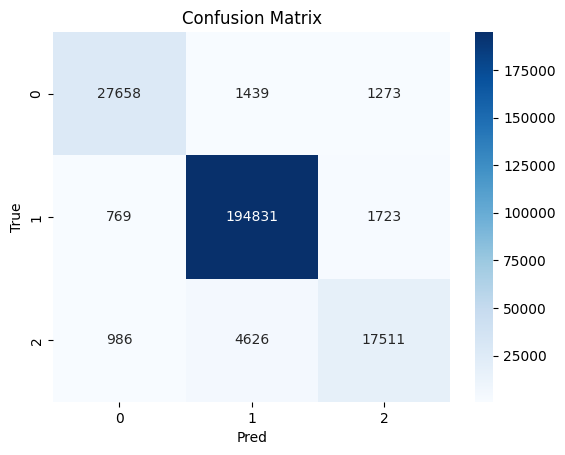

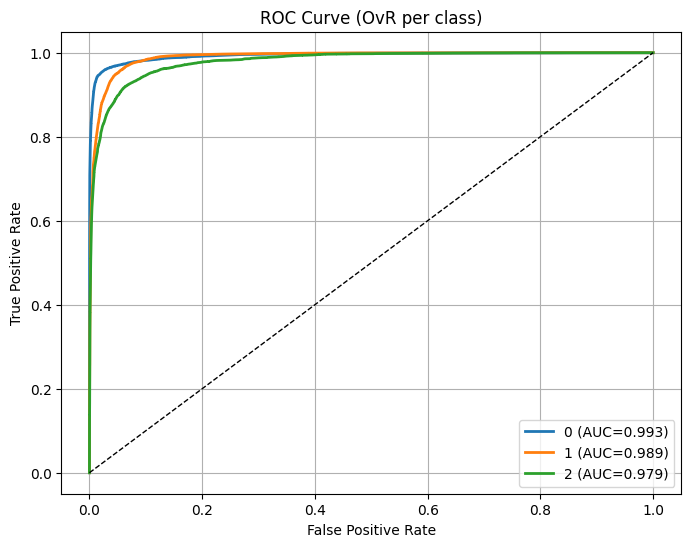

In [ ]:
evaluate(model, X_val,  y_val)   # validation


── XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=200, n_jobs=2,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...) report ──
              precision    recall  f1-score   support

           0     0.9410    0.9086    0.9245     30365
           1     0.9698    0.9875    0.9786    197290
           2     0.8543    0.7598    0.8043     2

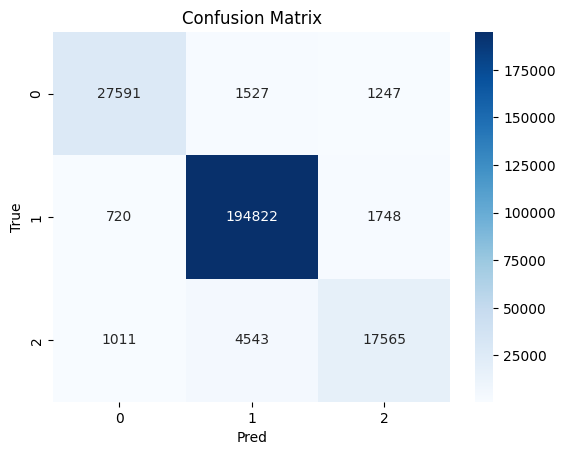

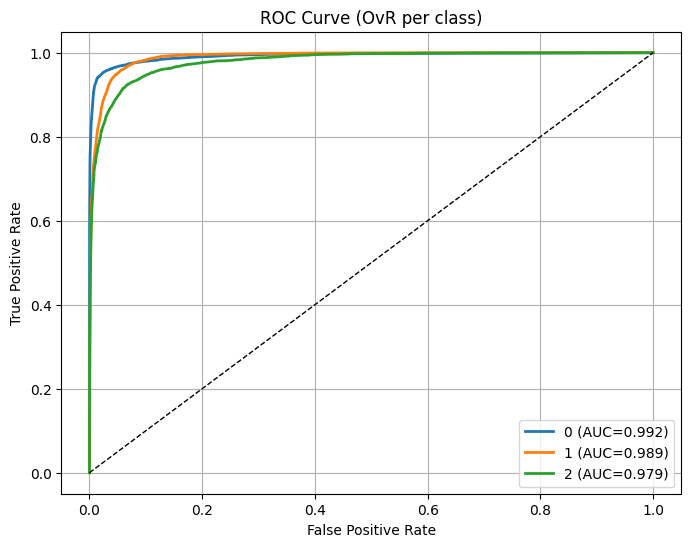

In [ ]:
evaluate(model, X_test,  y_test)   # test

          feature   importance
0    power_factor  5898.058105
1           ratio  1234.624390
2    active_power   355.388367
3  reactive_power   302.215546
4      log_active   295.171021
5    log_reactive   246.792374
6  apparent_power   192.917923


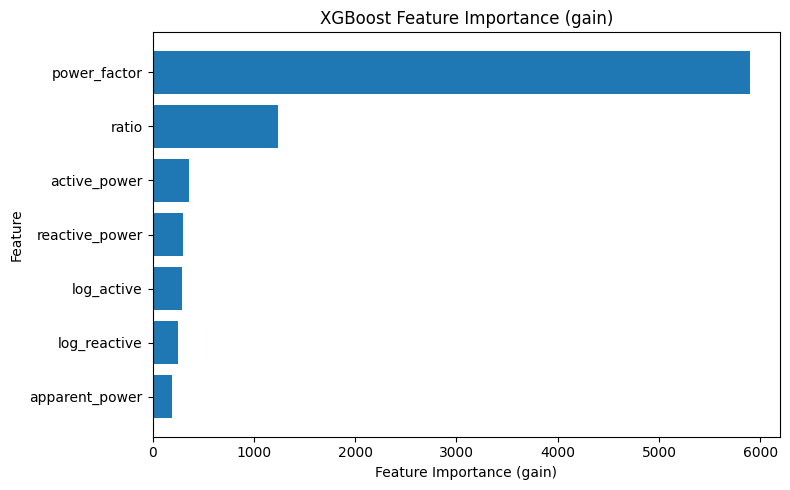

In [ ]:
# ──────────────────────────────
# 7) Feature Importance (해석)

# 중요도 추출 (gain 기준 추천)
importances = model.get_booster().get_score(importance_type='gain')
imp_df = (
    pd.Series(importances)
    .sort_values(ascending=False)
    .rename_axis('feature')
    .reset_index(name='importance')
)

print(imp_df)

# 그래프로 시각화
plt.figure(figsize=(8, 5))
plt.barh(imp_df['feature'], imp_df['importance'])
plt.xlabel('Feature Importance (gain)')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance (gain)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']

In [ ]:
# Booster 객체만 저장 (XGBClassifier가 아니라 booster만)
model.get_booster().save_model('xgb_model.json')

In [ ]:
class_weights

{np.int64(0): np.float64(2.752829314307356),
 np.int64(1): np.float64(0.42369827759747075),
 np.int64(2): np.float64(3.615756575796619)}

# 전력데이터 파이프라인

In [ ]:
# ──────────────────────────────
# 라이브러리
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline      import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.metrics       import classification_report, confusion_matrix, roc_auc_score
from xgboost               import XGBClassifier            #  ↔ lightgbm.LGBMClassifier 도 동일 방식
from imblearn.over_sampling import SMOTE                   # 소수 클래스 증강 (선택)
from sklearn.preprocessing import LabelEncoder


# ──────────────────────────────
# 1) 원본 데이터 불러오기 & 기본 정제
# df_clean: ["유효전력평균","무효전력평균","label_역률평균"]
df = df_clean.copy()

# ① 음수 → 0 보정  (측정기 노이즈)
df[['유효전력평균','무효전력평균']] = df[['유효전력평균','무효전력평균']].clip(lower=0)

# ② 0-0 행 제거
df = df[~((df['유효전력평균'] == 0) & (df['무효전력평균'] == 0))].reset_index(drop=True)

# ──────────────────────────────
# 2) 특징 생성
df['ratio'] = df['무효전력평균'] / df['유효전력평균'].replace(0, np.nan)
df['log_active']   = np.log1p(df['유효전력평균'])
df['log_reactive'] = np.log1p(df['무효전력평균'])

feature_cols = ['유효전력평균','무효전력평균','ratio','log_active','log_reactive']
X = df[feature_cols].fillna(0)
y = df['label_역률평균']          # 다중 클래스: 정상·주의·경고

# ──────────────────────────────
# 3) 학습-검증-테스트 분리 (7:1.5:1.5, stratify by label)
X_tmp, X_test, y_tmp, y_test = train_test_split(X, y, test_size=0.15,
                                                random_state=42, stratify=y)
X_train, X_val,  y_train, y_val = train_test_split(X_tmp, y_tmp, test_size=0.1765,
                                                  random_state=42, stratify=y_tmp)
print({s:len(v) for s,v in zip(
      ['train','valid','test'],[y_train,y_val,y_test])})

### 라벨 인코딩
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_valid_enc = le.transform(y_val)
y_test_enc = le.transform(y_test)

# ──────────────────────────────
# 4) 파이프라인 정의 (스케일러+SMOTE+XGBoost)
scale = StandardScaler()
smote = SMOTE(random_state=42)

model = XGBClassifier(
        objective='multi:softprob',
        eval_metric='mlogloss',
        learning_rate=0.05,
        max_depth=4,
        n_estimators=300,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
)

pipe = Pipeline([
    ('sc', scale),     # fit_transform
    ('sm', smote),     # fit_resample (imblearn 단계)
    ('clf', model)     # fit
])

# ──────────────────────────────
# 5) 교차검증(옵션) + 학습
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(pipe, X_train, y_train_enc,
                            cv=cv, scoring='f1_macro', n_jobs=-1)
print("CV Macro-F1 :", cv_scores.mean().round(4), "±", cv_scores.std().round(4))

pipe.fit(X_train, y_train_enc)

# ──────────────────────────────
# 6) 검증/테스트 성능
def evaluate(split, X_, y_enc, label_encoder):
    y_pred_enc = split.predict(X_)
    y_pred = label_encoder.inverse_transform(y_pred_enc)
    y_true = label_encoder.inverse_transform(y_enc)

    print(f"\n── {split} report ──")
    print(classification_report(y_true, y_pred, digits=4))


    # One-vs-rest AUC
    y_prob = split.predict_proba(X_)
    auc = roc_auc_score(pd.get_dummies(y_true).values, y_prob, multi_class='ovr')
    print("ROC-AUC (OvR):", round(auc,4))
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred, labels=label_encoder.classes_)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix"); plt.ylabel("True"); plt.xlabel("Pred"); plt.show()


evaluate(pipe, X_val,  y_val)   # validation
evaluate(pipe, X_test, y_test)  # test

# ──────────────────────────────
# 7) Feature Importance (해석)
importances = pipe['clf'].get_booster().get_score(importance_type='gain')
imp_df = (pd.Series(importances)
            .reset_index().rename(columns={'index':'feature',0:'gain'})
            .sort_values('gain', ascending=False))
print(imp_df.head(10))



## Requirements

In [ ]:
pip uninstall -y xgboost

Found existing installation: xgboost 2.1.4
Uninstalling xgboost-2.1.4:
  Successfully uninstalled xgboost-2.1.4


In [ ]:
pip install -q xgboost==1.7.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 7.3 MB/s eta 0:00:00


In [ ]:
import os, sys, importlib
import xgboost as xgb
print("xgboost version:", xgb.__version__)
# → 1.7.6 인지 확인

xgboost version: 1.7.6


In [ ]:
df.to_csv("clf_energy_df.csv", index=False, encoding="utf-8")